

# Project 2: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

 This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The dataset is from [kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

### Data Dictionary

> 01 - `PatientId`: Identification of a patient  
02 - `AppointmentID`: Identification of each appointment  
03 - `Gender`: Male or Female  
04 - `DataMarcacaoConsulta`: The day of the actuall appointment, when they have to visit the doctor.  
05 - `DataAgendamento`: The day someone called or registered the appointment, this is before appointment of course.  
06 - `Age`: How old is the patient.  
07 - `Neighbourhood`: Where the appointment takes place.  
08 - `Scholarship`: True of False . Observation, this is a broad topic, consider reading this [article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)  
09 - `Hipertension`: True or False  
10 - `Diabetes`: True or False  
11- `Alcoholism`: True or False  
12- `Handcap`: True or False  
13- `SMS_received`: 1 or more messages sent to the patient.  
14- `No-show`: True or False.

### The questions that will be answered are: 
> 01- In term of age categories, which category has the most showing up to their appointment?  
02- Does scholarship affect on patients attending to their appointment?  
03- Does no SMS received affect the attendance of patients?
04- In term of Gender, who is the most showin up and no show to their appointment?  
05- Compare between the number of patients with chronic diseases who attended the appointment with the number of those who did not attend the appointment?

In [121]:
# Import package
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

***

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [122]:
# load no show appointments data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# display first five rows of data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [123]:
#display last five rows in the dataset.
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


> These columns names (`Hipertension`, `Handcap`, and `No-show`) need to change

In [124]:
#display number of rows and columns
df.shape

(110527, 14)

> This dataset has `110527` rows and `14` columns.

In [125]:
#display summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [126]:
#inspecting Data Types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> There are some columns with uncorrect format: `(PatientId, scheduledDay,and AppointmentDay)` but we don't need it in our analysis.

In [127]:
# evaluating for missing data 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> There is `no NaN values` in this dataset. 

In [128]:
#evaluating for duplicate rows 
df.duplicated().sum()

0

> There is `no duplicate rows`

In [129]:
df.nunique() 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> The `handicap` column must be `2 unique values not 5`! 

In [130]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The minimum age is `-1` which is `not a correct age`

# After reviewing the dataset, these issues need to be cleaned:
 1- **Drop columns** that I don't need in answering my questions  
 
 2- **Rename** these columns names: `Hipertension`, `Handcap`, and `No-show`.

 3- **Change** the `No_show` column values from ('No', 'Yes') to ( 0, 1).

 4- **Drop Rows** in `Handicap` and `Age` columns which have uncorrect data.



### Drop Columns:

In [131]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1, inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


### Rename Columns:

In [132]:
df.rename({'Hipertension':'Hypertension','Handcap': 'Handicap', 'No-show': 'No_show' }, axis = 1, inplace=True)
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


### Change `No_show` Column Values:

In [133]:
df['No_show'].replace('No',0 , inplace=True)
df['No_show'].replace('Yes',1 , inplace=True)
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


### Drop Rows in `Handicap` and `Age` columns

In [134]:
df.drop(df[df['Handicap'] >= 2 ].index, inplace = True)
df.drop(df[df['Age'] == -1 ].index, inplace = True)

In [135]:
df['Handicap'].unique()

array([0, 1])

### **All issues are now fixed!**

In [136]:
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110327 non-null  object
 1   Age           110327 non-null  int64 
 2   Scholarship   110327 non-null  int64 
 3   Hypertension  110327 non-null  int64 
 4   Diabetes      110327 non-null  int64 
 5   Alcoholism    110327 non-null  int64 
 6   Handicap      110327 non-null  int64 
 7   SMS_received  110327 non-null  int64 
 8   No_show       110327 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 8.4+ MB


In [138]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,0.201927
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,0.401440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*** 

<a id='eda'></a>
# Exploratory Data Analysis


###  Q1: In term of age categories, which category has the most showing up to their appointment?

> To answer this question, I needed to break down the `Age column` into categories using `cut function` to segment and sort data values into bins.

In [139]:
# break down age ccolumn into categories
bins = [0,2,18,50,115]
labels = ['0-2', '2-18', '18-50', '50-115']
df['age_categories'] = pd.cut(df['Age'], bins, labels = labels)

In [140]:
df.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,age_categories
0,F,62,0,1,0,0,0,0,0,50-115
1,M,56,0,0,0,0,0,0,0,50-115
2,F,62,0,0,0,0,0,0,0,50-115
3,F,8,0,0,0,0,0,0,0,2-18
4,F,56,0,1,1,0,0,0,0,50-115


> A new column is created to classify the age     
Then, I needed to filter the `No Show column` with only `show up` data and count the number of patient in every age categories

In [141]:
# filtering No_show column to only show up data
df_0 = df.query('No_show == 0')
df_0.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,age_categories
0,F,62,0,1,0,0,0,0,0,50-115
1,M,56,0,0,0,0,0,0,0,50-115
2,F,62,0,0,0,0,0,0,0,50-115
3,F,8,0,0,0,0,0,0,0,2-18
4,F,56,0,1,1,0,0,0,0,50-115


In [142]:
# counting the number of patients in every categories
show_up_df = df_0.groupby(['age_categories'], as_index = True)['No_show'].count()
show_up_df

age_categories
0-2        3224
2-18      16355
18-50     35941
50-115    29629
Name: No_show, dtype: int64

> Then, I plotted a `horizontal bar chart` to visualize number of patients who showing up to their appointment based on age categories

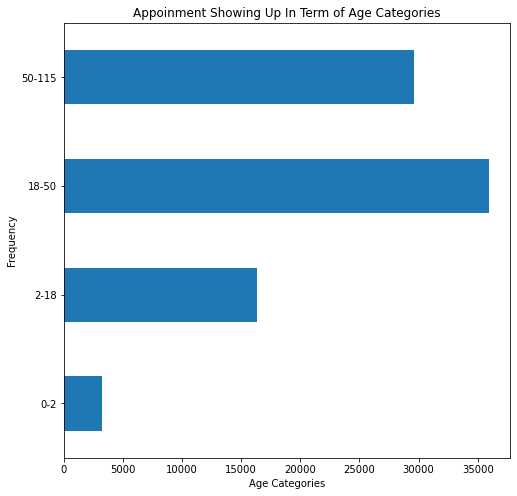

In [143]:
# plot a horizontal bar chart
show_up_df.plot.barh(figsize = (8,8), title = 'Appoinment Showing Up In Term of Age Categories')
plt.xlabel('Age Categories')
plt.ylabel('Frequency')
plt.show()

> **Now, we can see that the highest category that attended to their appointment was `the age category between 18 to 50`.**

### Q2: Does scholarship affect on patients attending to their appointment?
> To answer this question, first I needed to count the frequency of each unique values (0 and 1) in `Scholarship column` using `value_counts()` function.

In [144]:
df['Scholarship'].value_counts()

0    99484
1    10843
Name: Scholarship, dtype: int64

> After that, to visualize the result I plotted a `pie chart` and show the `percentage` of patients who have scholarship and who haven't.

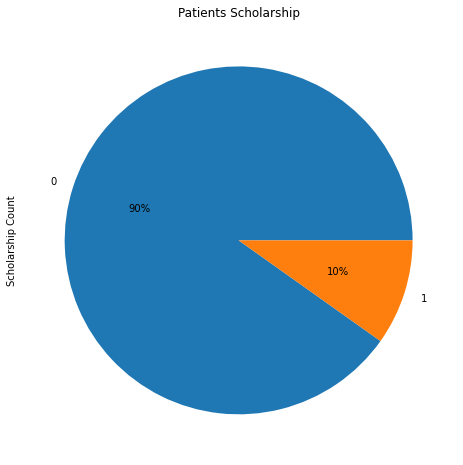

In [145]:
df['Scholarship'].value_counts().plot(kind = 'pie' , labels=["0","1"], figsize = (8,8), autopct='%1.0f%%');
plt.ylabel("Scholarship Count")
plt.title("Patients Scholarship");

> As we can see here, `90%` of patients **don't have scholarship** while almost `10%` only **have**  
Then, I needed to group and count the `scholarship` by `No_show` using **groupby** and **count** function 

In [146]:
counts = df.groupby(['No_show', 'Scholarship'])['Scholarship'].count()
counts

No_show  Scholarship
0        0              79783
         1               8266
1        0              19701
         1               2577
Name: Scholarship, dtype: int64

> Thereafter, I plotted a ` grouped bar chart` that show the attendance based on either the patient have a scholarship ot not.

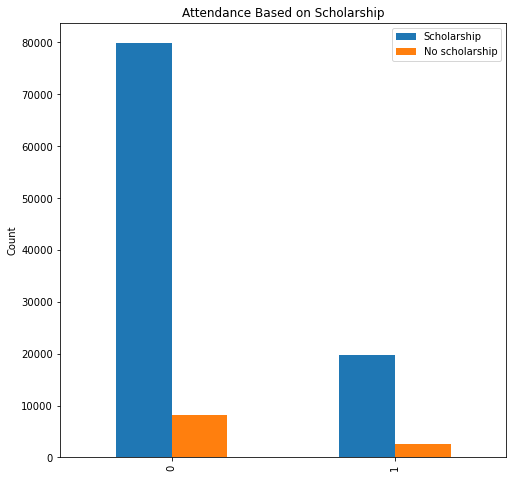

In [147]:
plotdata = pd.DataFrame({
    "Scholarship":[79783,19701],
    "No scholarship":[8266, 2577]
    }, 
    index=["0", "1"]
)
plotdata.plot(kind="bar" , figsize = (8,8))
plt.title("Attendance Based on Scholarship")
plt.ylabel("Count");

> As we can see, `90%` of patients `don't have a scholarship` but their **showing up** to the appoinment is `more 3 times` than **no showing!**  
So, the scholarship has `no effect` on showing the patients up to thier appointment. 

### Q3: Does no SMS received affect the attendance of patients?
> To answer this question, I filtered the `SMS_received` column to show only the patients who didn't received SMS then I grouped by `No_show` and countted the values using **groupby** and **count** functions. 

In [148]:
df_sms = df.query('SMS_received == 0')
df_sms.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,age_categories
0,F,62,0,1,0,0,0,0,0,50-115
1,M,56,0,0,0,0,0,0,0,50-115
2,F,62,0,0,0,0,0,0,0,50-115
3,F,8,0,0,0,0,0,0,0,2-18
4,F,56,0,1,1,0,0,0,0,50-115


In [149]:
df_sms.shape

(74892, 10)

> The total number of patients who don't received SMS is `74892`

In [150]:
df_sms.groupby(['No_show'], as_index = True)['SMS_received'].count()

No_show
0    62389
1    12503
Name: SMS_received, dtype: int64

> I plotted a `pie chart` to visualize the result.

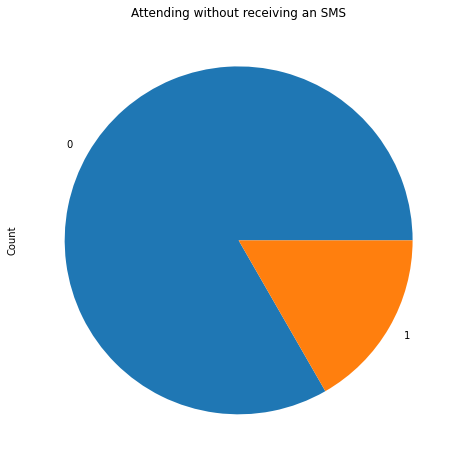

In [151]:
df_sms.groupby(['No_show'], as_index = True)['SMS_received'].count().plot(kind = 'pie' , labels=["0","1"], figsize = (8,8));
plt.ylabel("Count")
plt.title("Attending without receiving an SMS");

> We can see that, the total number of patients who didn't received SMS is **74892**, `62389` of them showing up to thier appointment and `12503` didn't. So, the receiving SMS has `no effect` on showing the patients up to thier appointment.



### Q4: In term of Gender, who is the most showin up and no show to their appointment? 
> First, I wanted to know how many Female and male in the dataset. So, I counted the `Gender` column values using **value_counts** function.

In [152]:
df['Gender'].value_counts()

F    71730
M    38597
Name: Gender, dtype: int64

> The number of **female** patients `(71730)` is more than **male** patients `(38597)`  
Then, I grouped the gender by No_show to classify the attending based on gender type and count the values.

In [153]:
df.groupby(['No_show', 'Gender'], as_index = True)['SMS_received'].count()

No_show  Gender
0        F         57162
         M         30887
1        F         14568
         M          7710
Name: SMS_received, dtype: int64

> I plotted a `horizontal bar chart` to visualize the result.

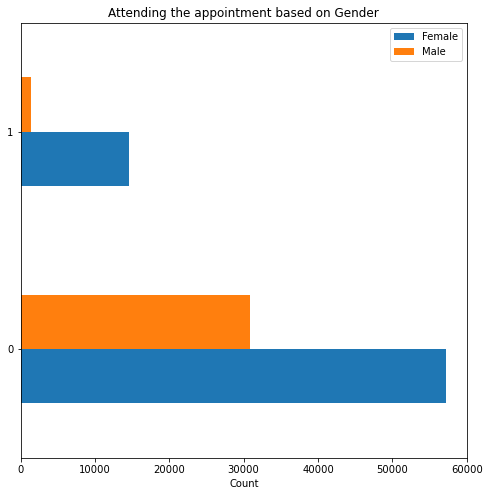

In [154]:
plotdata = pd.DataFrame({
    "Female":[57162, 14568],
    "Male":[30887, 1422]
    }, 
    index=["0", "1"]
)
plotdata.plot.barh(figsize = (8,8))
plt.title("Attending the appointment based on Gender")
plt.xlabel("Count");

> We can see that, `female` patients is the most showing up and no showing to thier appointment than male. 

### Q5: Compare between the number of patients with chronic diseases who attended the appointment with the number of those who did not attend the appointment?
> I needed to filter the dataset according to `chronic diseases with no show` to thier appointment using **query** function. 

In [155]:
def query(var, condition):
    var = df.query(condition)

query(df_hy, 'Hypertension == 1')
df_hy.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,age_categories
0,F,62,0,1,0,0,0,0,0,50-115
4,F,56,0,1,1,0,0,0,0,50-115
5,F,76,0,1,0,0,0,0,0,50-115
25,M,46,0,1,0,0,0,1,0,18-50
26,F,45,0,1,0,0,0,0,0,18-50


In [156]:
counts = df_hy.groupby(['No_show'])['Hypertension'].count()
counts

No_show
0    17968
1     3748
Name: Hypertension, dtype: int64

In [157]:
query(df_d,'Diabetes == 1')
df_d.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,age_categories
4,F,56,0,1,1,0,0,0,0,50-115
36,F,63,0,1,1,0,0,0,0,50-115
37,F,64,1,1,1,0,0,0,0,50-115
41,F,71,0,0,1,0,0,0,0,50-115
44,F,78,0,1,1,0,0,0,1,50-115


In [158]:
counts = df_d.groupby(['No_show'])['Diabetes'].count()
counts

No_show
0    6478
1    1422
Name: Diabetes, dtype: int64

In [159]:
query(df_c,'Alcoholism == 1')
df_c.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,age_categories
46,M,58,0,1,0,1,0,1,0,50-115
131,M,29,0,0,0,1,0,0,1,18-50
133,M,69,0,0,1,1,0,0,0,50-115
186,M,66,0,1,0,1,0,0,0,50-115
207,M,46,0,0,0,1,0,0,0,18-50


In [160]:
counts = df_c.groupby(['No_show'])['Alcoholism'].count()
counts

No_show
0    2677
1     675
Name: Alcoholism, dtype: int64

In [161]:
query(df_h,'Handicap == 1')
df_h.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,age_categories
147,F,65,0,1,0,0,1,0,0,50-115
189,F,77,0,1,0,0,1,0,0,50-115
190,M,81,0,0,0,0,1,0,0,50-115
199,M,62,0,1,1,0,1,0,0,50-115
211,F,56,0,1,0,0,1,0,0,50-115


In [162]:
counts = df_h.groupby(['No_show'])['Handicap'].count()
counts

No_show
0    1676
1     366
Name: Handicap, dtype: int64

> I made a new dataframe to summarize the above result.

In [163]:
data = {'show_up': [17968, 6478, 2677, 1676],
                     'no_show': [3748, 1422, 675, 366]}
chronic_diseases_df = pd.DataFrame(data, index =['Hypertension',
                                'Diabetes',
                                'Alcoholism',
                                'Handicap'])
chronic_diseases_df

,show_up,no_show
Hypertension,17968,3748
Diabetes,6478,1422
Alcoholism,2677,675
Handicap,1676,366


> Then, I plotted the result into a `grouped bar chart`.

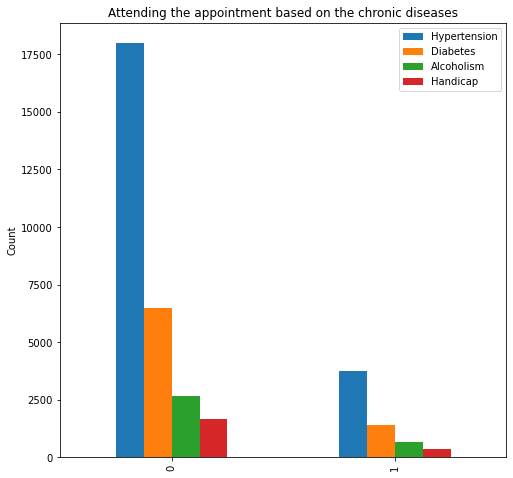

In [164]:
plotdata = pd.DataFrame({
    "Hypertension":[17968, 3748],
    "Diabetes":[6478, 1422],
    "Alcoholism":[2677, 675],
    "Handicap": [1676, 366]
    }, 
    index=["0", "1"]
)
plotdata.plot(kind="bar" , figsize = (8,8))
plt.title("Attending the appointment based on the chronic diseases")
plt.ylabel("Count");

> As we can see, the patients with Hypertension diseases is the highest number of patients than other as well as  their showing up to the appointment is the highest too  
Also the number of patients who have chronic diseases and show up to appointment is more than no show.



***


# Conclusion
### In this project I cleaned up and analyzed the dataset and answered some questions and came to this conclusion:
> The number of appointments  was **110327**, **71730** appointments for female and **38597** for male. The female patients was the most showing up and no showing to the appointment than male. The age ranged from **0 to 115** and the most age group that shoing up to the appointment was between **18 - 50**, Adults group followed by the age group **50 - 115**, senior group. Number of patients who have scholarship was **10843** and who don't have **99484**. Having scholarship doesn't effect on showing up the patients to the appointment because  90% of patients don't have a scholarship but their show up was more than no show. Also receiving SMS doesn't effect on showing up the patients to the appointment becuase the total number of patients who don't received SMS is 74892, 62389 of them showing up to thier appointment which is more than who no show. Furthermore having a chronic diseases doesn't effect on the attending of patients to the appointment. The number of patients who have chronic diseases and show up to appointment is more than no show. Among the patients who have a chronic diseases, the patients with Hypertension diseases is the highest number of patients than other as well as their showing up to the appointment is the highest too. In the end, having scholarship, having a chronic diseases, or not receiving SMS doesn't effect on patients attending to their appointment.


# Limitition
- Maybe there are other factors that affect patients attendance to the appointment rather than those in the dataset like: weather condition, and traffic jam.
- There is no feature represent the patient current job which I guess maybe effect in attendance.

*** 

# Resource
* https://pandas.pydata.org/docs/reference/frame.html
* https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
* https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

